# MTL in Detection of Emotion, Toxicity Classification

### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline


In [2]:
def select_device(device=''):
    if device.lower() == 'cuda':
        if not torch.cuda.is_available():
            print ("torch.cuda not available")
            return torch.device('cpu')    
        else:
            return torch.device('cuda:0')
    if device.lower() == 'dml':
        return td.device(td.default_device())
    else:
        return torch.device('cpu')

In [3]:
device = select_device('dml')

#### 1.1 Import Dataset

In [2]:
name_8k_dataset = "Almost Balance_Dataset_ChattyTicket.csv"

In [26]:
df = pd.read_csv('../dataset/Almost Balance_Dataset_ChattyTicket.csv', encoding='utf-8')
df2 = pd.read_csv('../dataset/Almost Balance_unrevised_Dataset_ChattyTicket.csv')

In [27]:
# combined the two df
df_combined = pd.concat([df, df2], ignore_index=True)

In [9]:
# check for any null values
print(df_combined.isnull().sum())

username    3
chat        0
emotion     0
toxicity    0
dtype: int64


In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8087 entries, 0 to 8086
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  8084 non-null   object
 1   chat      8087 non-null   object
 2   emotion   8087 non-null   object
 3   toxicity  8087 non-null   object
dtypes: object(4)
memory usage: 252.8+ KB


In [11]:
df.head()

,username,chat,emotion,toxicity
0,Jape,-140,neutral,not toxic
1,Shizuwu,5,neutral,not toxic
2,neverland,80,neutral,not toxic
3,LikMaB#alls,88,neutral,not toxic
4,Iskiri,120,neutral,not toxic


In [28]:
df = df_combined.sample(frac=1)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.tail()

,username,chat,emotion,toxicity
8082,MiNayeon#PENGU,Bobo ka,anger,Cyberbullying
8083,Nek0#meoww,nice g,happy,not toxic
8084,DaBoMi#mob1,run,happy,not toxic
8085,neverland,TAPOS?,disgust,sarcasm
8086,TS Monsterific #6969,you piece of trash,anger,Cyberbullying


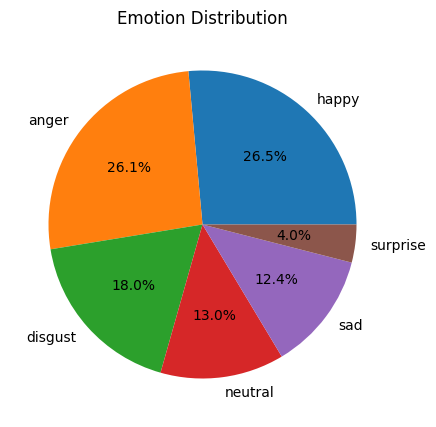

In [29]:
plt.figure(figsize=(10,5))
df['emotion'].value_counts().plot(kind='pie',  autopct='%1.1f%%')
plt.ylabel('')
plt.title('Emotion Distribution')
plt.show()

In [32]:
df['toxicity'] = df['toxicity'].apply(lambda x: x.lower())

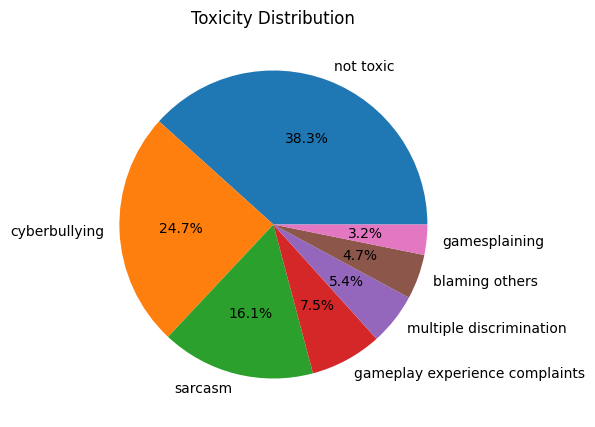

In [33]:
plt.figure(figsize=(10,5))
df['toxicity'].value_counts().plot(kind='pie',  autopct='%1.1f%%')
plt.ylabel('')
plt.title('Toxicity Distribution')
plt.show()

In [31]:
df['toxicity'].value_counts()

toxicity
not toxic                         3099
cyberbullying                     1362
sarcasm                           1302
Cyberbullying                      635
Gameplay Experience Complaints     610
Multiple Discrimination            440
gamesplaining                      256
Blaming others                     236
blaming others                     144
Sarcasm                              2
Gamesplaining                        1
Name: count, dtype: int64

In [ ]:
# bar plot 
plt.figure(figsize=(10,5))
df['toxicity'].value_counts().plot(kind='pie')
plt.ylabel('Number of chats')
plt.xlabel('Toxicity')
plt.title('Toxicity Distribution')
plt.show()

#### 1.2 Check all the classes

`toxicity`

In [19]:
df['toxicity'].value_counts()

toxicity
not toxic                         3099
cyberbullying                     1362
sarcasm                           1302
Cyberbullying                      635
Gameplay Experience Complaints     610
Multiple Discrimination            440
gamesplaining                      256
Blaming others                     236
blaming others                     144
Sarcasm                              2
Gamesplaining                        1
Name: count, dtype: int64

In [20]:
df['toxicity']= df['toxicity'].apply(lambda x: x.lower())

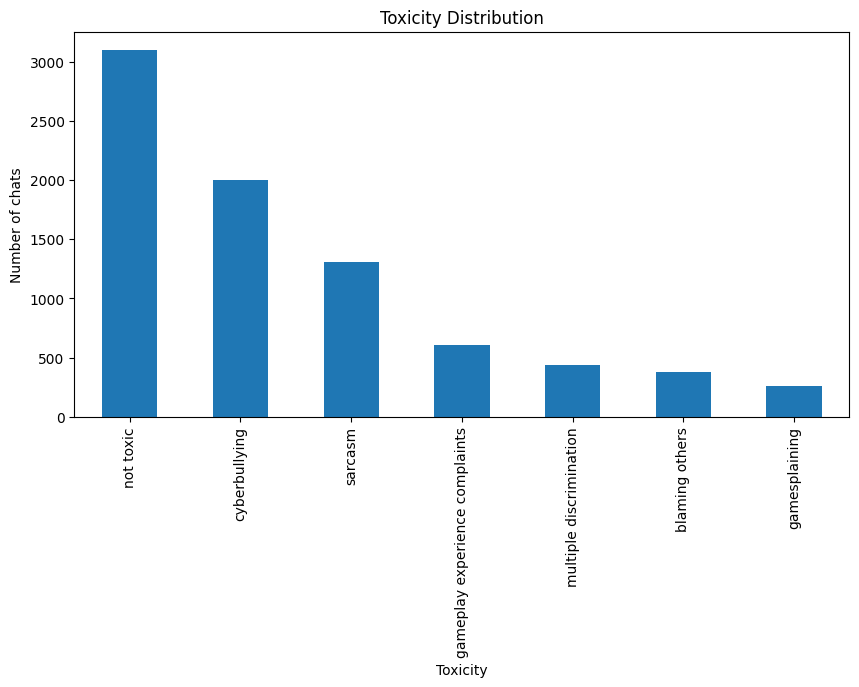

In [21]:
# bar plot 
plt.figure(figsize=(10,5))
df['toxicity'].value_counts().plot(kind='bar')
plt.ylabel('Number of chats')
plt.xlabel('Toxicity')
plt.title('Toxicity Distribution')
plt.show()

`emotion / sentiment`

In [22]:
df['emotion'].value_counts()

emotion
happy       2140
anger       2112
disgust     1458
neutral     1051
sad         1004
surprise     322
Name: count, dtype: int64

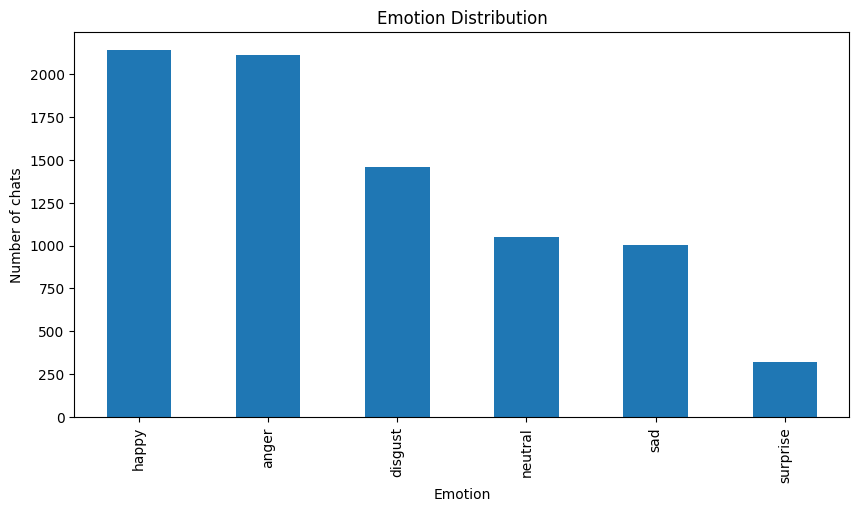

In [23]:
# bar plot 
plt.figure(figsize=(10,5))
df['emotion'].value_counts().plot(kind='bar')
plt.ylabel('Number of chats')
plt.xlabel('Emotion')
plt.title('Emotion Distribution')
plt.show()

Test dataset from the survey and real chat

In [7]:
df2 = pd.read_csv('../dataset/Almost Balance_unrevised_Dataset_ChattyTicket.csv')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  759 non-null    object
 1   chat      759 non-null    object
 2   emotion   759 non-null    object
 3   toxicity  759 non-null    object
dtypes: object(4)
memory usage: 23.8+ KB


In [5]:
df2.head()

,username,chat,emotion,toxicity
0,GT BLACKSHEEP XIE,mb,sad,not toxic
1,GT BLACKSHEEP XIE,mb kj,sad,not toxic
2,GT BLACKSHEEP XIE,wp,happy,not toxic
3,GT BLACKSHEEP XIE,hahahaahaa,happy,not toxic
4,GT BLACKSHEEP XIE,noice HAHAHHAHAHA,happy,not toxic


In [6]:
df2['toxicity']= df2['toxicity'].apply(lambda x: x.lower())

In [7]:
df2['emotion'].value_counts()

emotion
anger       192
happy       184
disgust     134
neutral     120
sad         108
surprise     21
Name: count, dtype: int64

In [23]:
df2['toxicity'].value_counts()

toxicity
not toxic                         407
cyberbullying                     143
sarcasm                            90
gameplay experience complaints     65
multiple discrimination            31
blaming others                     22
gamesplaining                       1
Name: count, dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  759 non-null    object
 1   chat      759 non-null    object
 2   emotion   759 non-null    object
 3   toxicity  759 non-null    object
dtypes: object(4)
memory usage: 23.8+ KB


In [25]:
df2['emotion'].value_counts()

emotion
anger       192
happy       184
disgust     134
neutral     120
sad         108
surprise     21
Name: count, dtype: int64

In [26]:
# compute the test set
print("Total Test set",(7928*0.11)+759)

Total Test set 1631.08


Getting the portion data from the big dataset

In [8]:
df = df.sample(frac=1)

In [9]:
from sklearn.model_selection import train_test_split
train, test =  train_test_split(df, test_size=0.11)

In [29]:
train.to_pickle('../dataset/preprocessed_df_train.pkl')

Combining the two datasets

In [10]:
test_ = pd.concat([df2, test])

In [11]:
df2['emotion'].value_counts()

emotion
anger       192
happy       184
disgust     134
neutral     120
sad         108
surprise     21
Name: count, dtype: int64

In [12]:
train['toxicity'].value_counts()

toxicity
not toxic                         2396
cyberbullying                     1097
sarcasm                           1059
Cyberbullying                      569
Gameplay Experience Complaints     488
Multiple Discrimination            364
gamesplaining                      228
Blaming others                     213
blaming others                     105
Sarcasm                              2
Name: count, dtype: int64

In [13]:
test_['toxicity'].value_counts()

toxicity
not toxic                         703
cyberbullying                     265
sarcasm                           243
Cyberbullying                      66
gameplay experience complaints     65
Gameplay Experience Complaints     57
Multiple Discrimination            45
blaming others                     39
multiple discrimination            31
gamesplaining                      29
Blaming others                     23
Name: count, dtype: int64

In [14]:
test_['emotion'].value_counts()

emotion
happy       402
anger       388
disgust     271
neutral     249
sad         196
surprise     60
Name: count, dtype: int64

In [35]:
# check for any null values
print(test_.isnull().sum())

username    0
chat        0
emotion     0
toxicity    0
dtype: int64


In [36]:
# export train set
test_.to_pickle('../dataset/preprocessed_df_test.pkl')

In [15]:
combined_df = pd.concat([train,test_], ignore_index=True)

In [38]:
combined_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

In [16]:
combined_df['toxicity'].value_counts()

toxicity
not toxic                         3099
cyberbullying                     1362
sarcasm                           1302
Cyberbullying                      635
Gameplay Experience Complaints     545
Multiple Discrimination            409
gamesplaining                      257
Blaming others                     236
blaming others                     144
gameplay experience complaints      65
multiple discrimination             31
Sarcasm                              2
Name: count, dtype: int64

In [40]:
combined_df

,username,chat,emotion,toxicity
0,GT BLACKSHEEP # XIE,gagaling hays,sad,sarcasm
1,Aoki #xyr,Have a good day,happy,not toxic
2,bagal #3250,rotating,neutral,not toxic
3,CST kenz#porks,glhf,sad,sarcasm
4,Zero Integral #AVI,glhf,sad,sarcasm
...,...,...,...,...
8082,Sanibeu#DDG,wtf,anger,cyberbullying
8083,iskay #0525,surrender nalang,sad,gameplay experience complaints
8084,VEli#1830,'your aim sucks',anger,blaming others
8085,Kuro#9045,ggez,neutral,sarcasm


In [17]:
combined_df['toxicity']= combined_df['toxicity'].apply(lambda x: x.lower())

In [41]:
train

,username,chat,emotion,toxicity
3233,GT BLACKSHEEP # XIE,gagaling hays,sad,sarcasm
4284,Aoki #xyr,Have a good day,happy,not toxic
6932,bagal #3250,rotating,neutral,not toxic
2307,CST kenz#porks,glhf,sad,sarcasm
7319,Zero Integral #AVI,glhf,sad,sarcasm
...,...,...,...,...
5231,Bunchun#7up,tanga,anger,cyberbullying
6003,chiefZr0#6969,"""nt""",happy,not toxic
5,hecs#2OO1,GG,happy,sarcasm
1855,SCE Hades #Riz,nice game,happy,not toxic


In [42]:
test_['emotion'].value_counts()

emotion
anger       402
happy       382
disgust     297
neutral     216
sad         213
surprise     56
Name: count, dtype: int64

In [19]:
combined_df['emotion'].value_counts()

emotion
happy       2140
anger       2112
disgust     1458
neutral     1051
sad         1004
surprise     322
Name: count, dtype: int64

In [18]:
combined_df['toxicity'].value_counts()

toxicity
not toxic                         3099
cyberbullying                     1997
sarcasm                           1304
gameplay experience complaints     610
multiple discrimination            440
blaming others                     380
gamesplaining                      257
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder_emotion = OneHotEncoder(sparse_output=False)
encoder_toxicity = OneHotEncoder(sparse_output=False)

y_toxicity_combined = encoder_toxicity.fit_transform(combined_df[['toxicity']])
y_emotion_combined = encoder_emotion.fit_transform(combined_df[['emotion']])



In [20]:
combined_df

,username,chat,emotion,toxicity
0,YXA Wala#YSA,ok,neutral,not toxic
1,Yummy hotdog #tomeh,pakyu,disgust,cyberbullying
2,Fry #Bait,useless,disgust,cyberbullying
3,Leeey#2003,horny shits,happy,gameplay experience complaints
4,fishybench#6069,shut up,anger,gameplay experience complaints
...,...,...,...,...
8082,Yaroツ#pork,cool skin,happy,not toxic
8083,Bianx#whiff,paskin,neutral,not toxic
8084,Jape,fr fr,surprise,sarcasm
8085,Cookie Crinkles#TSV,Ang lakas mo naman po.,surprise,not toxic


In [21]:
combined_df.drop_duplicates(subset=['chat', 'emotion'], inplace=True)

In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4756 entries, 0 to 8086
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  4755 non-null   object
 1   chat      4756 non-null   object
 2   emotion   4756 non-null   object
 3   toxicity  4756 non-null   object
dtypes: object(4)
memory usage: 185.8+ KB


In [23]:
combined_df['emotion'].value_counts()

emotion
anger       1379
happy       1064
disgust      956
neutral      766
sad          416
surprise     175
Name: count, dtype: int64

In [24]:
combined_df['toxicity'].value_counts()

toxicity
not toxic                         1692
cyberbullying                     1222
sarcasm                            577
gameplay experience complaints     447
multiple discrimination            353
blaming others                     248
gamesplaining                      217
Name: count, dtype: int64

In [25]:
combined_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

# Data Augmentation for Unbalanced Dataset

### Under Sampling

In [47]:
# Toxicity
def undersample(df):
    classes = df.toxicity.value_counts().to_dict()
    least_class_amount = min(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['toxicity'] == key]) 
    classes_sample = []
    for i in range(0,len(classes_list)-1):
        classes_sample.append(classes_list[i].sample(least_class_amount))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[-1]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [48]:
undersampled_df = undersample(combined_df)

In [49]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  1799 non-null   object
 1   chat      1799 non-null   object
 2   emotion   1799 non-null   object
 3   toxicity  1799 non-null   object
dtypes: object(4)
memory usage: 56.3+ KB


In [50]:
undersampled_df['toxicity'].value_counts()

toxicity
not toxic                         257
cyberbullying                     257
sarcasm                           257
gameplay experience complaints    257
multiple discrimination           257
blaming others                    257
gamesplaining                     257
Name: count, dtype: int64

In [51]:
undersampled_df['emotion'].value_counts()

emotion
anger       657
disgust     491
happy       243
sad         182
neutral     173
surprise     53
Name: count, dtype: int64

In [52]:
undersampled_df = undersampled_df.sample(frac=1)

In [53]:
undersampled_df= undersampled_df.reset_index(drop=True)

In [54]:
undersampled_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

In [55]:
undersampled_df

,username,chat,emotion,toxicity
0,NON #TAE,n*gga,anger,multiple discrimination
1,bbkakai #catto,comeback pa,disgust,sarcasm
2,haru#riee,go quit,anger,gamesplaining
3,Jape,HANGAL,anger,cyberbullying
4,ylysah#mer,boosted,disgust,gameplay experience complaints
...,...,...,...,...
1794,CHRONOS #MICHY,Kaya pa yan,happy,not toxic
1795,neverland,sana ikaw nagtanim,anger,sarcasm
1796,Fry #Bait,pabigat ka,disgust,gameplay experience complaints
1797,Crescht #blom,gg!,sad,sarcasm


In [57]:
undersampled_df['chat'].str.len().min()

1

In [30]:
# toxicity
def oversample(df):
    classes = df.emotion.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['emotion'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [61]:
oversampled_df = oversample(combined_df)

In [62]:
oversampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  21684 non-null  object
 1   chat      21693 non-null  object
 2   emotion   21693 non-null  object
 3   toxicity  21693 non-null  object
dtypes: object(4)
memory usage: 678.0+ KB


In [63]:
oversampled_df['emotion'].value_counts()

emotion
anger       7792
disgust     6104
happy       2943
sad         2111
neutral     2035
surprise     708
Name: count, dtype: int64

In [64]:
# emotion
def undersample(df):
    classes = df.emotion.value_counts().to_dict()
    least_class_amount = min(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['emotion'] == key]) 
    classes_sample = []
    for i in range(0,len(classes_list)-1):
        classes_sample.append(classes_list[i].sample(least_class_amount))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[-1]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [65]:
over_under_sampled_df = undersample(oversampled_df)

In [66]:
over_under_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  4247 non-null   object
 1   chat      4248 non-null   object
 2   emotion   4248 non-null   object
 3   toxicity  4248 non-null   object
dtypes: object(4)
memory usage: 132.9+ KB


In [70]:
over_under_sampled_df['emotion'].value_counts()

emotion
anger       708
disgust     708
happy       708
sad         708
neutral     708
surprise    708
Name: count, dtype: int64

In [76]:
over_under_sampled_df['toxicity'].value_counts()

toxicity
not toxic                         973
sarcasm                           868
gameplay experience complaints    570
blaming others                    543
multiple discrimination           457
cyberbullying                     452
gamesplaining                     385
Name: count, dtype: int64

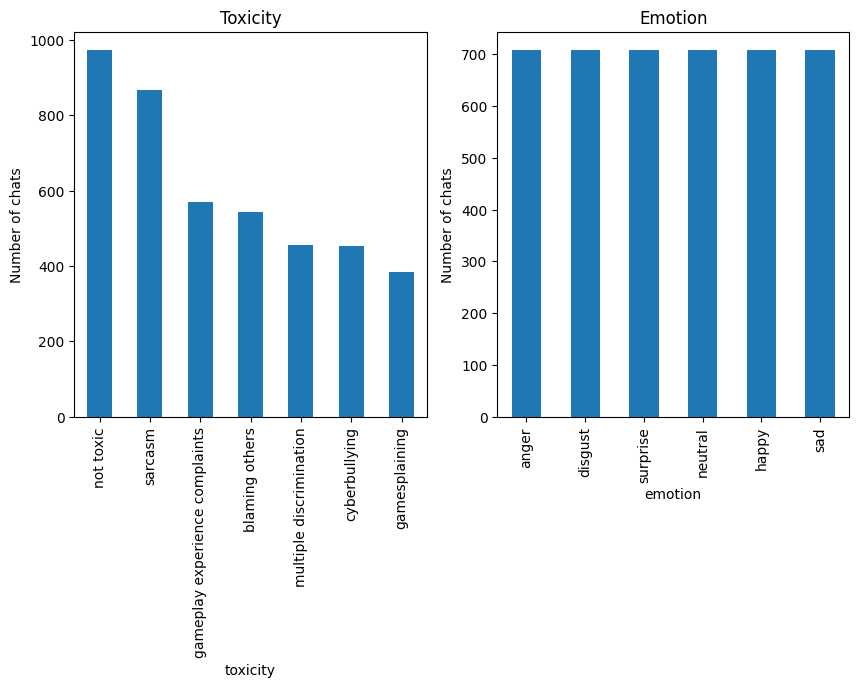

In [78]:
fig = plt.figure(figsize=(10,5))
# Value counts of toxicity
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Toxicity')
ax1.set_xlabel('Toxicity')
ax1.set_ylabel('Number of chats')
over_under_sampled_df['toxicity'].value_counts().plot(kind='bar')


ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Emotion')
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Number of chats')
over_under_sampled_df['emotion'].value_counts().plot(kind='bar')

plt.show()


In [77]:
over_under_sampled_df = over_under_sampled_df.sample(frac=1)
over_under_sampled_df= over_under_sampled_df.reset_index(drop=True)

In [74]:
over_under_sampled_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

## Reshufling the dataset

In [3]:
combined = pd.read_pickle('../dataset/preprocessed_df_combined.pkl')

In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8274 entries, 4091 to 2119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  8273 non-null   object
 1   chat      8274 non-null   object
 2   emotion   8274 non-null   object
 3   toxicity  8274 non-null   object
dtypes: object(4)
memory usage: 323.2+ KB


In [5]:
combined["emotion"].value_counts()

emotion
neutral     1379
happy       1379
disgust     1379
anger       1379
sad         1379
surprise    1379
Name: count, dtype: int64

In [6]:
combined["toxicity"].value_counts()

toxicity
not toxic                         3217
cyberbullying                     1846
sarcasm                           1294
gameplay experience complaints     734
multiple discrimination            533
blaming others                     379
gamesplaining                      271
Name: count, dtype: int64

In [21]:
combined = combined.sample(frac=1)

In [17]:
agents = [
    {
        "username": "agent1",
        "chat":"astra",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent3",
        "chat":"breach",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent4",
        "chat":"brimstone",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent5",
        "chat":"cypher",
        "emotion": "neutral",
        "toxicity": "not toxic"

    },
    {
        "username":"agent6",
        "chat":"jett",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent7",
        "chat":"killjoy",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent8",
        "chat":"omen",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent9",
        "chat":"phoenix",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent10",
        "chat":"raze",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent11",
        "chat":"reyna",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent12",
        "chat":"sova",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent13",
        "chat":"skye",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent14",
        "chat":"viper",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent15",
        "chat":"yoru",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent16",
        "chat":"sage",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent17",
        "chat":"fade",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent18",
        "chat":"gekko",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent19",
        "chat":"harbor",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent20",
        "chat":"iso",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent21",
        "chat":"deadlock",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent22",
        "chat":"chamber",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent23",
        "chat":"neon",
        "emotion": "neutral",
        "toxicity": "not toxic"
    },
    {
        "username":"agent24",
        "chat":"kay/o",
        "emotion": "neutral",
        "toxicity": "not toxic"
    }

]

In [22]:
# add the agents to the dataset
agents_df = pd.DataFrame(agents)

# combine the agents with the dataset
combined_df = pd.concat([combined, agents_df], ignore_index=True)

In [23]:
combined_df.tail(26)

,username,chat,emotion,toxicity
4753,neverland,tf,surprise,cyberbullying
4754,icy#1724,"""you suck""",anger,cyberbullying
4755,Kuraidu #yAah,Good luck have fun,happy,not toxic
4756,agent1,astra,neutral,not toxic
4757,agent3,breach,neutral,not toxic
4758,agent4,brimstone,neutral,not toxic
4759,agent5,cypher,neutral,not toxic
4760,agent6,jett,neutral,not toxic
4761,agent7,killjoy,neutral,not toxic
4762,agent8,omen,neutral,not toxic


In [31]:
oversampled_df = oversample(combined_df)

In [33]:
oversampled_df=oversampled_df.sample(frac=1)

emotion
neutral     1379
happy       1379
disgust     1379
anger       1379
sad         1379
surprise    1379
Name: count, dtype: int64

In [35]:
oversampled_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

In [2]:
dfs = pd.read_pickle('../dataset/preprocessed_df_combined.pkl')

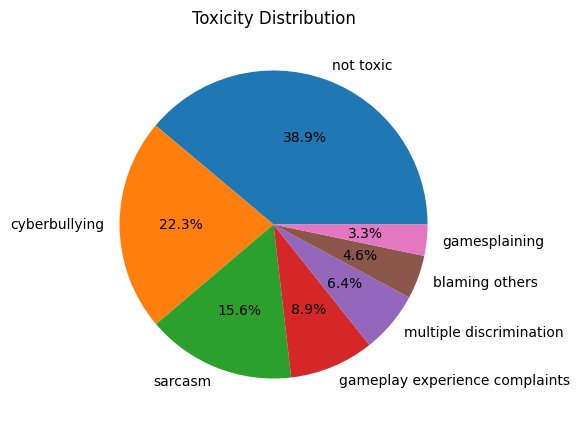

In [21]:
plt.figure(figsize=(10,5))
dfs['toxicity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Toxicity Distribution')
plt.show()

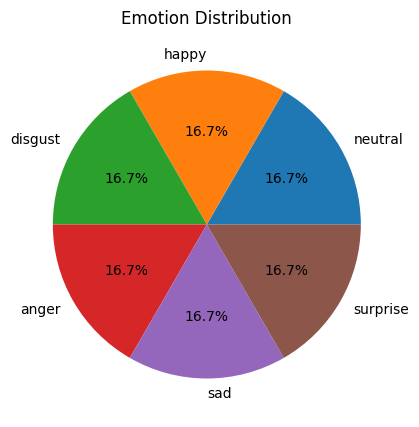

In [22]:
plt.figure(figsize=(10,5))
dfs['emotion'].value_counts().plot(kind='pie',  autopct='%1.1f%%')
plt.ylabel('')
plt.title('Emotion Distribution')
plt.show()
